In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
from os import listdir

In [3]:
names = listdir('./imgs/')

In [4]:
def data_store(path):
    X_1 = []
    y_1 = []
    for i in listdir(path) :
        for j in listdir(path+i) :
            img = cv2.imread(path+i+'/'+j)
            img = cv2.resize(img ,(200,200))
            X_1.append(img)
            y_1.append(i)
            
    return X_1 , y_1        
        

In [5]:
X_train , y_train = data_store('./imgs/')

In [6]:
photo =X_train[400]

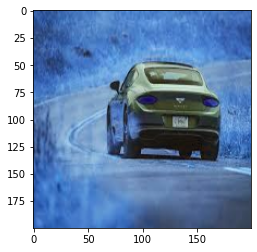

In [7]:
plt.imshow(photo)

In [11]:
y_train_cat = pd.get_dummies(y_train)

In [12]:
y_train_cat

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Ram Trucks,Renault,Saab,Studebaker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
y_train_cat.shape

(4597, 50)

In [14]:
X_train_real=np.array(X_train)

In [15]:
X_train_real.shape

(4597, 200, 200, 3)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import keras

In [17]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape=(200,200,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
          
# FC NN
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(50))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 20)      1520      
_________________________________________________________________
activation (Activation)      (None, 200, 200, 20)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 50)      25050     
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 50)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 125000)            0

In [18]:
model.fit(X_train_real , y_train_cat,epochs=50)

Epoch 1/50
144/144 [==============================] - 201s 1s/step - loss: 37.8724 - accuracy: 0.0267
Epoch 2/50
144/144 [==============================] - 189s 1s/step - loss: 20.0783 - accuracy: 0.0283
Epoch 3/50
144/144 [==============================] - 190s 1s/step - loss: 15.9748 - accuracy: 0.0414
Epoch 4/50
144/144 [==============================] - 187s 1s/step - loss: 13.1763 - accuracy: 0.0403
Epoch 5/50
144/144 [==============================] - 193s 1s/step - loss: 11.1150 - accuracy: 0.0466
Epoch 6/50
144/144 [==============================] - 191s 1s/step - loss: 9.6716 - accuracy: 0.0652
Epoch 7/50
144/144 [==============================] - 191s 1s/step - loss: 8.4586 - accuracy: 0.0718
Epoch 8/50
144/144 [==============================] - 193s 1s/step - loss: 7.4424 - accuracy: 0.0789
Epoch 9/50
144/144 [==============================] - 183s 1s/step - loss: 6.6809 - accuracy: 0.0841
Epoch 10/50
144/144 [==============================] - 185s 1s/step - loss: 6.0471 - a

In [19]:
model.save('200X200_car.h5')

In [141]:
test = cv2.imread('./imgs/Audi/Audi_060.jpg')
test = cv2.resize(test ,(200,200))
test = test.reshape(1,200,200,3)

In [142]:
p = model.predict(test)
count = 0
result=[]
p=p.reshape(50,1)

In [143]:
def find_max( list ):
    max = list[ 0 ]
    k=0
    for a in list:
        if a > max:
            max = a
            b=k
        k=k+1    
    return max , b
 

In [144]:
result , call = find_max(p)

In [146]:
result

array([0.968846], dtype=float32)

In [145]:
names[call]

'Audi'

In [148]:
result

array([0.968846], dtype=float32)

In [72]:
p[0]

array([0.00016779], dtype=float32)

'Alfa Romeo'

In [78]:
k =0

In [82]:
def find_max( list ):
    max = list[ 0 ]
    k=0
    for a in list:
        if a > max:
            max = a
            b=k
        k=k+1    
    return max , b
 

In [83]:
 result , b = find_max(p)

In [84]:
result

array([0.7636636], dtype=float32)

In [63]:
type(p)

numpy.ndarray

In [66]:
p[0]

array([0.00016779], dtype=float32)

In [73]:
call

'Volvo'

In [85]:
names[b]

'Jaguar'

In [147]:
p

array([[4.21562252e-09],
       [2.69746579e-07],
       [2.19450527e-07],
       [9.68846023e-01],
       [1.35837547e-06],
       [1.14428360e-06],
       [1.01018231e-04],
       [8.76630565e-06],
       [1.98493828e-04],
       [4.56510463e-07],
       [4.11021484e-09],
       [1.42285546e-06],
       [9.83779273e-07],
       [5.94142371e-08],
       [5.60529827e-07],
       [1.58849423e-06],
       [1.09917295e-07],
       [1.15837576e-03],
       [9.16719841e-07],
       [2.63359738e-07],
       [3.00855429e-09],
       [2.67586929e-05],
       [1.51459722e-06],
       [5.31899332e-07],
       [3.55010457e-06],
       [1.23524543e-07],
       [2.68378053e-02],
       [7.80654518e-05],
       [6.78712420e-10],
       [1.28571573e-03],
       [1.70158344e-07],
       [1.21033338e-06],
       [7.35955313e-04],
       [3.03924578e-04],
       [1.90438939e-07],
       [5.34636138e-06],
       [3.48688081e-05],
       [2.15841632e-04],
       [3.64493680e-09],
       [1.31024592e-06],


In [2]:
from keras.models import Sequential

In [ ]:
http://www.regcheck.org.uk/api/reg.asmx/CheckIndia

In [24]:
p

array([[7.99776885e-08],
       [3.69280431e-04],
       [1.12550552e-07],
       [3.87194319e-07],
       [4.26863822e-10],
       [9.41706730e-07],
       [9.65609491e-01],
       [1.71507352e-07],
       [4.90442835e-06],
       [1.05549616e-05],
       [3.44358086e-05],
       [2.40389574e-02],
       [5.66767221e-06],
       [6.78381039e-05],
       [7.86650656e-09],
       [2.40456629e-05],
       [5.42735623e-04],
       [5.67870337e-08],
       [9.11955098e-08],
       [1.65609657e-04],
       [1.16888674e-04],
       [1.79409498e-09],
       [3.18130196e-06],
       [1.19555210e-04],
       [3.61403152e-09],
       [1.24354671e-07],
       [1.13077522e-05],
       [2.05969908e-10],
       [4.24679705e-08],
       [1.45800287e-08],
       [4.28449409e-03],
       [1.33323174e-05],
       [7.47772137e-05],
       [1.12578637e-04],
       [5.91063645e-06],
       [1.19611155e-03],
       [1.72524778e-05],
       [2.59810826e-03],
       [8.90450538e-05],
       [2.52531318e-04],
